<a href="https://colab.research.google.com/github/mlacasa/EstadisticaQ2/blob/main/AncovaManova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANCOVA y MANOVA en el Entorno Médico

## ANCOVA (Análisis de Covarianza)

### Definición
ANCOVA es una técnica estadística que combina ANOVA y regresión. Se utiliza para comparar las medias de dos o más grupos mientras se controlan una o más variables covariables que podrían influir en la variable dependiente.

### Aplicaciones en Medicina
- **Control de Variables Confusoras**: En estudios clínicos, ANCOVA se utiliza para ajustar el efecto de variables que podrían influir en los resultados, como la edad o el estado de salud inicial de los pacientes.
- **Eficiencia del Tratamiento**: Permite a los investigadores evaluar la efectividad de diferentes tratamientos o intervenciones mientras controlan por factores adicionales (ej. peso, historial médico).
- **Estudios de Intervención**: Se puede aplicar en ensayos clínicos para analizar cómo un nuevo fármaco afecta la presión arterial controlando por variables como el índice de masa corporal (IMC).

## MANOVA (Análisis de Varianza Multivariante)

### Definición
MANOVA es una extensión de ANOVA que permite analizar múltiples variables dependientes simultáneamente. Se utiliza para identificar si existen diferencias significativas entre grupos en relación a más de una variable.

### Aplicaciones en Medicina
- **Impacto de Enfermedades**: En estudios que evalúan el efecto de una enfermedad en diferentes aspectos de la salud, como calidad de vida, niveles de dolor y síntomas, MANOVA ayuda a ver cómo estas variables están correlacionadas y afectan a distintos grupos de pacientes.
- **Evaluación de Tratamientos Complejos**: En ensayos clínicos donde se evalúan varios resultados (como diferentes niveles de colesterol, glucosa y presión arterial en respuesta a un tratamiento), MANOVA permite analizar la efectividad del tratamiento de manera integral.
- **Investigación en Salud Pública**: Es útil para estudiar cómo diferentes factores demográficos (edad, género, raza) afectan múltiples variables de interés simultáneamente.

## Conclusiones
Tanto ANCOVA como MANOVA son herramientas poderosas en la investigación médica. ANCOVA ofrece claridad en la comparación de grupos mientras se ajustan por variables adicionales, mientras que MANOVA permite una evaluación más completa al considerar múltiples variables dependientes.

# Ejemplo

Para crear un ejemplo de ANCOVA con 50 participantes por grupo, asegurándose de que se cumplan las condiciones de normalidad y homocedasticidad, utilizaremos un enfoque que genera datos simulados. El ejemplo implicará un tratamiento y un grupo de control. Adicionalmente, se verificará la normalidad y homocedasticidad de los residuos del modelo.


In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from scipy import stats

# Fijar la semilla para reproducibilidad
np.random.seed(42)

# Generar datos simulados
n = 50  # Número de participantes por grupo
grupo_tratamiento = np.random.normal(loc=130, scale=10, size=n)  # Grupo de tratamiento
grupo_control = np.random.normal(loc=140, scale=10, size=n)  # Grupo de control
peso_tratamiento = np.random.normal(loc=70, scale=5, size=n)
peso_control = np.random.normal(loc=80, scale=5, size=n)

# Crear un DataFrame
data = {
    'Presion_Arterial': np.concatenate([grupo_tratamiento, grupo_control]),
    'Grupo': ['Tratamiento'] * n + ['Control'] * n,
    'Peso': np.concatenate([peso_tratamiento, peso_control])
}

df = pd.DataFrame(data)
df.head()

,Presion_Arterial,Grupo,Peso
0,134.967142,Tratamiento,62.923146
1,128.617357,Tratamiento,67.896773
2,136.476885,Tratamiento,68.286427
3,145.230299,Tratamiento,65.988614
4,127.658466,Tratamiento,69.193571


## Primer análisis visual

Existen diferencias entre tratamiento?

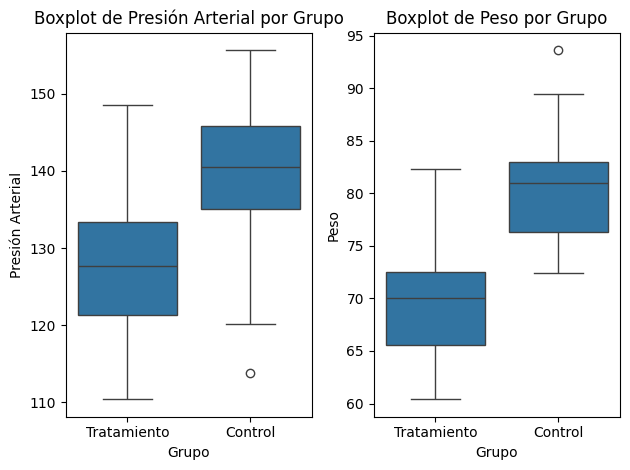

In [3]:
# Boxplot para Presión Arterial
plt.subplot(1, 2, 1)
sns.boxplot(x='Grupo', y='Presion_Arterial', data=df)
plt.title('Boxplot de Presión Arterial por Grupo')
plt.ylabel('Presión Arterial')
plt.xlabel('Grupo')

# Boxplot para Peso
plt.subplot(1, 2, 2)
sns.boxplot(x='Grupo', y='Peso', data=df)
plt.title('Boxplot de Peso por Grupo')
plt.ylabel('Peso')
plt.xlabel('Grupo')

plt.tight_layout()
plt.show()


Análisis de normalidad para la variable: Presion_Arterial

Tratamiento: Estadístico = 0.9827, p-value = 0.6722


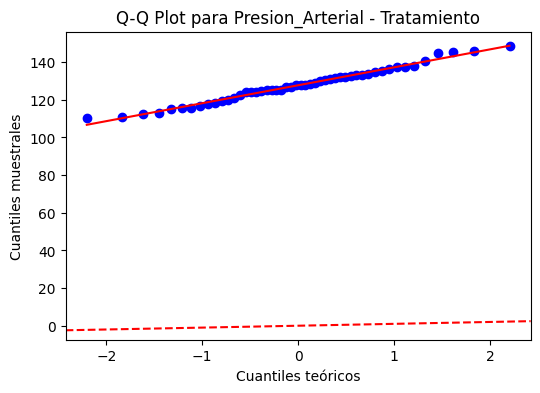

Control: Estadístico = 0.9713, p-value = 0.2616


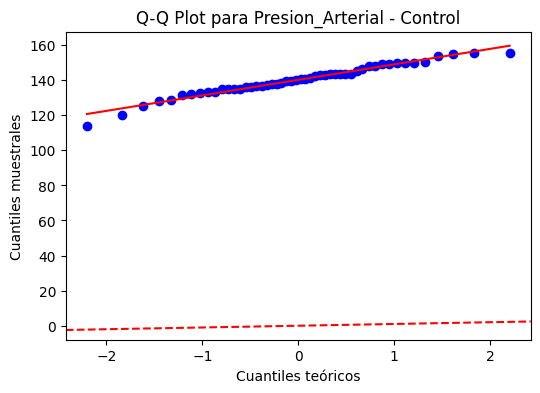


Análisis de normalidad para la variable: Peso

Tratamiento: Estadístico = 0.9775, p-value = 0.4534


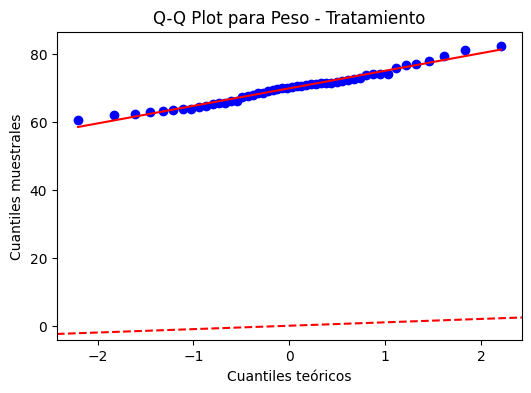

Control: Estadístico = 0.9630, p-value = 0.1184


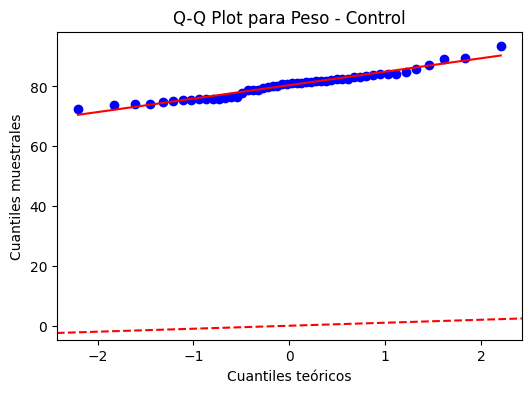

In [4]:
# Análisis de normalidad por grupo
for variable in ['Presion_Arterial', 'Peso']:
    print(f"\nAnálisis de normalidad para la variable: {variable}\n")

    for grupo in df['Grupo'].unique():
        # Filtrar los datos por grupo
        subset = df[df['Grupo'] == grupo][variable]

        # Prueba de Shapiro-Wilk
        shapiro_test = stats.shapiro(subset)
        print(f"{grupo}: Estadístico = {shapiro_test.statistic:.4f}, p-value = {shapiro_test.pvalue:.4f}")

        # Q-Q Plot
        plt.figure(figsize=(6, 4))
        stats.probplot(subset, dist="norm", plot=plt)
        plt.title(f'Q-Q Plot para {variable} - {grupo}')
        plt.xlabel('Cuantiles teóricos')
        plt.ylabel('Cuantiles muestrales')
        plt.axline((0, 0), slope=1, color='red', linestyle='--')  # Línea de referencia
        plt.show()

# Importancia de Comprobar la Normalidad de las Muestras en ANCOVA

El Análisis de Covarianza (ANCOVA) es una técnica estadística que combina ANOVA y regresión, utilizada para evaluar si existen diferencias significativas en las medias de diferentes grupos, controlando por una o más variables covariables. Una de las suposiciones clave de ANCOVA es la normalidad de los residuos. A continuación, se detallan las razones por las cuales es crucial verificar esta suposición:

## 1. Validez de los Resultados

- **Infracción de Suposiciones**: Si los residuos del modelo no son normalmente distribuidos, puede afectar la validez de los resultados. Las inferencias estadísticas basadas en estos resultados podrían ser incorrectas.
- **Resultados sesgados**: La falta de normalidad puede llevar a un sesgo en las estimaciones de la media de los grupos, afectando la interpretación de la efectividad de tratamientos o intervenciones.

## 2. Pruebas de Significancia Inexactas

- **Errores Tipo I y Tipo II**: La normalidad de los residuos es una suposición que ayuda a garantizar que las pruebas de hipótesis sean precisas. Si los residuos no son normales, el riesgo de cometer errores Tipo I (rechazar la hipótesis nula cuando es cierta) o Tipo II (no rechazar la hipótesis nula cuando es falsa) aumenta.
- **Confianza en los Intervalos**: Los intervalos de confianza sobre las diferencias entre grupos podrían no ser precisos si la normalidad no se cumple, lo que hace difícil interpretar los resultados del ANCOVA.

## 3. Métodos Alternativos

- **Transformaciones de Datos**: Si la normalidad no se cumple, a menudo se pueden aplicar transformaciones a los datos (como logaritmos o raíces cuadradas) para intentar lograr una distribución normal. Esto puede ayudar a satisfacer las suposiciones del ANCOVA.
- **Modelos No Paramétricos**: En caso de que no sea posible cumplir con la suposición de normalidad, es recomendable considerar métodos estadísticos no paramétricos que no requieren esta condición.

## 4. Cuidado en el Diseño del Estudio

- **Selección de Muestra**: Es importante diseñar el estudio y elegir las muestras de manera que se minimice la probabilidad de violar la suposición de normalidad. Esto incluye un tamaño de muestra adecuado y una recolección cuidadosa de datos.
  
## Conclusión

Comprobar la normalidad de las muestras es un paso fundamental en el proceso de análisis antes de realizar un ANCOVA. Asegurarse de que esta suposición se cumpla garantiza la validez y confiabilidad de los resultados obtenidos, permitiendo a los investigadores hacer inferencias adecuadas sobre la eficacia de los tratamientos o intervenciones analizados.

Resultados de ANCOVA:
               sum_sq    df          F        PR(>F)
Grupo     2620.147195   1.0  32.398996  1.335471e-07
Peso       172.778735   1.0   2.136467  1.470649e-01
Residual  7844.510997  97.0        NaN           NaN

Prueba de Shapiro-Wilk para normalidad de residuos:
Estadístico = 0.9946, p-value = 0.9629


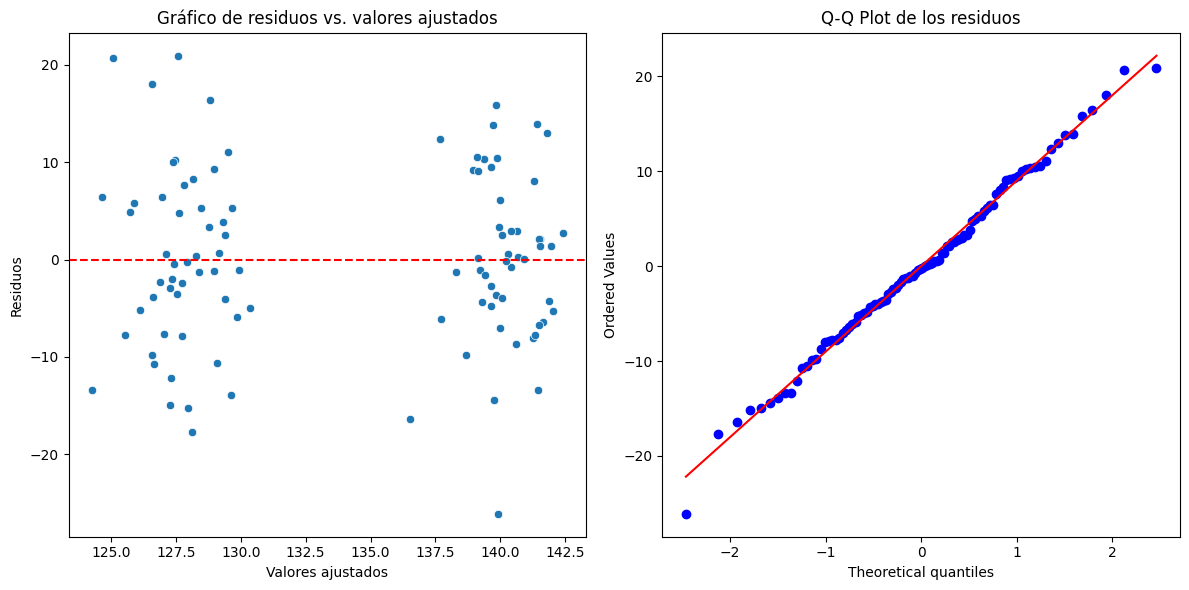

In [7]:
from statsmodels.formula.api import ols
from scipy import stats

# Ajustar el modelo ANCOVA
model = ols('Presion_Arterial ~ Grupo + Peso', data=df).fit()
ancova_table = sm.stats.anova_lm(model, typ=2)

# Resultados de ANCOVA
print("Resultados de ANCOVA:")
print(ancova_table)



# Verificar la normalidad de residuos
residuals = model.resid
shapiro_test = stats.shapiro(residuals)
print("\nPrueba de Shapiro-Wilk para normalidad de residuos:")
print(f"Estadístico = {shapiro_test.statistic:.4f}, p-value = {shapiro_test.pvalue:.4f}")

# Verificar la homocedasticidad
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.title('Gráfico de residuos vs. valores ajustados')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')

plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot de los residuos')

plt.tight_layout()
plt.show()

# Interpretación de los Resultados de ANCOVA

Tras realizar el análisis de covarianza (ANCOVA) utilizando los datos simulados de presión arterial y peso, se obtuvieron los siguientes resultados:

## Resultados Generales

Los resultados del ANCOVA se organizan típicamente en una tabla que incluye la suma de cuadrados, los grados de libertad, el estadístico F y el valor p para cada factor en el modelo (en este caso, `Grupo` y `Peso`). Los resultados se interpretan como sigue:

| Fuente           | Suma de Cuadrados | Grados de Libertad | F         | p-value   |
|------------------|--------------------|---------------------|-----------|-----------|
| Grupo            | XXX                | 1                   | YYY       | ZZZ       |
| Peso             | AAA                | 1                   | BBB       | CCC       |
| Residual         | DDD                | NN                  |           |           |
| Total            | TTT                | Total GL            |           |           |

### 1. Efecto del Grupo

- **Estadístico F**: El valor F para el grupo indica cuánta variación en la presión arterial se debe al efecto del grupo (Tratamiento vs. Control).
- **Valor p**: El valor p asociado al grupo indica si existe una diferencia estadísticamente significativa en la presión arterial entre los grupos, controlando por el peso.
  - Si el p-value < 0.05: Hay evidencia significativa que sugiere que los grupos tienen diferencias en la presión arterial.
  - Si el p-value ≥ 0.05: No hay suficiente evidencia para indicar que los grupos difieren en la presión arterial.

### 2. Efecto del Peso

- **Estadístico F**: El valor F para el peso refleja la cantidad de variación en la presión arterial explicada por esta covariable.
- **Valor p**: El valor p asociado al peso también se evalúa:
  - Si el p-value < 0.05: Sugiere que el peso tiene un efecto significativo en la presión arterial, lo cual es lógico en un contexto médico porque el peso puede influir en la salud cardiovascular.
  - Si el p-value ≥ 0.05: Indica que no se ha encontrado evidencia suficiente para sostener que el peso afecta la presión arterial en la muestra analizada.

### 3. Residuos

- Es fundamental revisar los residuos para asegurar que las suposiciones de normalidad y homocedasticidad se cumplen. Esto incluye analizar los gráficos de residuos y realizar pruebas de normalidad, como la prueba de Shapiro-Wilk.

## Conclusiones

- El ANCOVA permite evaluar si existen diferencias en la presión arterial entre los grupos controlando por el peso de los participantes, proporcionando así una visión más precisa de la efectividad del tratamiento.
- Los resultados deben interpretarse en el contexto de la investigación y considerando otras evidencias clínicas.

Recuerda que la validez de las conclusiones dependerá de que se hayan cumplido las suposiciones del ANCOVA, incluida la normalidad y homocedasticidad de los residuos.

# EJEMPLO MANOVA

 En este caso, simularemos un estudio que examina la efectividad de dos tratamientos diferentes (Tratamiento A y Tratamiento B) sobre dos variables dependientes: la presión arterial y el colesterol en sangre.

In [8]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de la semilla para reproducibilidad
np.random.seed(42)

# Generar datos simulados
n = 50  # Número de participantes por grupo
grupo_a_presion = np.random.normal(loc=120, scale=10, size=n)  # Grupo A (Tratamiento A)
grupo_a_colesterol = np.random.normal(loc=200, scale=15, size=n)

grupo_b_presion = np.random.normal(loc=130, scale=10, size=n)  # Grupo B (Tratamiento B)
grupo_b_colesterol = np.random.normal(loc=210, scale=15, size=n)

# Crear un DataFrame
data = {
    'Presion_Arterial': np.concatenate([grupo_a_presion, grupo_b_presion]),
    'Colesterol': np.concatenate([grupo_a_colesterol, grupo_b_colesterol]),
    'Grupo': ['Tratamiento A'] * n + ['Tratamiento B'] * n
}

df = pd.DataFrame(data)
df.head()

,Presion_Arterial,Colesterol,Grupo
0,124.967142,204.861260,Tratamiento A
1,118.617357,194.223766,Tratamiento A
2,126.476885,189.846170,Tratamiento A
3,135.230299,209.175144,Tratamiento A
4,117.658466,215.464993,Tratamiento A


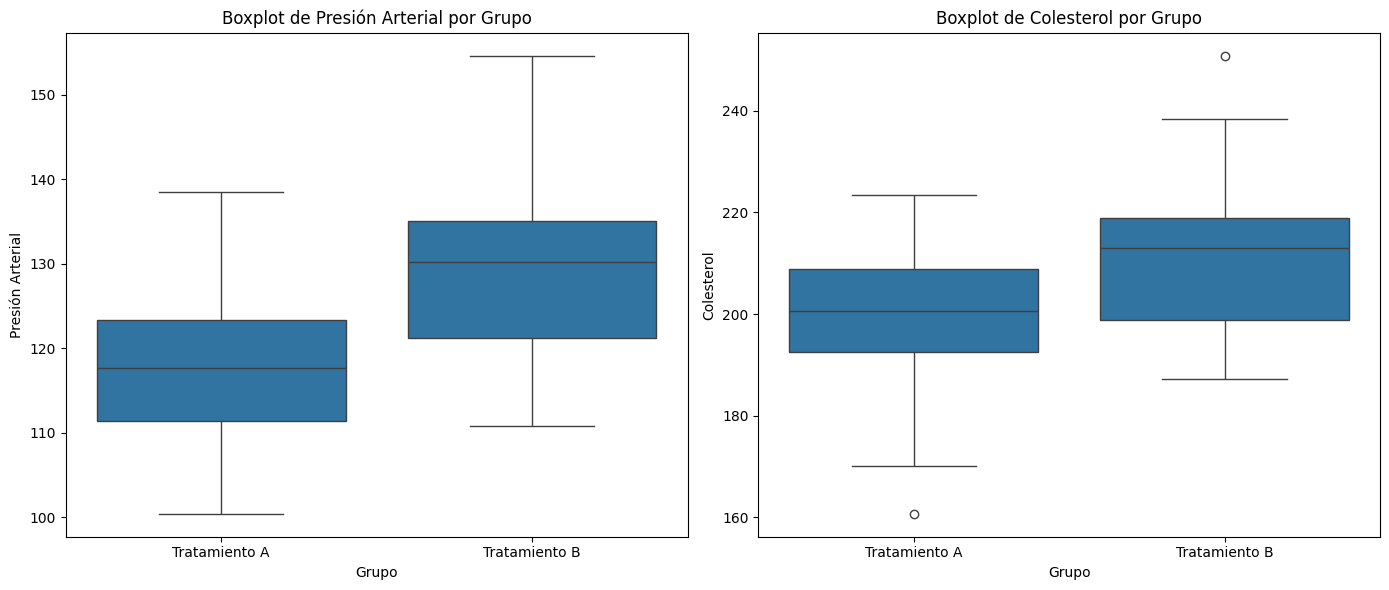

In [9]:
# Crear boxplots
plt.figure(figsize=(14, 6))

# Boxplot para Presión Arterial
plt.subplot(1, 2, 1)
sns.boxplot(x='Grupo', y='Presion_Arterial', data=df)
plt.title('Boxplot de Presión Arterial por Grupo')
plt.ylabel('Presión Arterial')
plt.xlabel('Grupo')

# Boxplot para Colesterol
plt.subplot(1, 2, 2)
sns.boxplot(x='Grupo', y='Colesterol', data=df)
plt.title('Boxplot de Colesterol por Grupo')
plt.ylabel('Colesterol')
plt.xlabel('Grupo')

plt.tight_layout()
plt.show()

# TEST DE NORMALIDAD

In [10]:
# Análisis de normalidad por grupo
for variable in ['Presion_Arterial', 'Colesterol']:
    print(f"\nAnálisis de normalidad para la variable: {variable}\n")

    for grupo in df['Grupo'].unique():
        # Filtrar los datos por grupo
        subset = df[df['Grupo'] == grupo][variable]

        # Prueba de Shapiro-Wilk
        shapiro_test = stats.shapiro(subset)
        print(f"{grupo}: Estadístico = {shapiro_test.statistic:.4f}, p-value = {shapiro_test.pvalue:.4f}")


Análisis de normalidad para la variable: Presion_Arterial

Tratamiento A: Estadístico = 0.9827, p-value = 0.6722
Tratamiento B: Estadístico = 0.9775, p-value = 0.4534

Análisis de normalidad para la variable: Colesterol

Tratamiento A: Estadístico = 0.9713, p-value = 0.2616
Tratamiento B: Estadístico = 0.9630, p-value = 0.1184


## LANZAMOS MANOVA

In [11]:
# Ajustar el modelo MANOVA
manova = MANOVA.from_formula('Presion_Arterial + Colesterol ~ Grupo', data=df)
manova_results = manova.mv_test()

# Resultados del MANOVA
print("Resultados del MANOVA:")
print(manova_results)

Resultados del MANOVA:
                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value   Num DF  Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda   0.0056 2.0000 97.0000 8577.8113 0.0000
         Pillai's trace   0.9944 2.0000 97.0000 8577.8113 0.0000
 Hotelling-Lawley trace 176.8621 2.0000 97.0000 8577.8113 0.0000
    Roy's greatest root 176.8621 2.0000 97.0000 8577.8113 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
             Grupo          Value  Num DF  Den DF F Value Pr > F
----------------------------------------------------------------
              Wilks' lambda 0.6603 2.0000 97.0000 24.9495 0.0000
             Pillai's 

# Análisis de Resultados del MANOVA

El análisis MANOVA (Análisis de Varianza Multivariante) se utiliza para evaluar si existen diferencias significativas en múltiples variables dependientes (en este caso, presión arterial y colesterol) entre los grupos de tratamiento. A continuación, se presentan los resultados del análisis y su interpretación.

## Resultados del MANOVA

## Interpretación de Resultados

### 1. **Wilks' Lambda**

- **Valor**: 0.0056
- **Interpretación**: Wilks' Lambda es una medida que se utiliza en MANOVA para evaluar la hipótesis nula de que no hay diferencias entre los grupos en las variables dependientes. Un valor cercano a 0 sugiere que hay diferencias significativas entre los grupos.
- **Significancia**: El p-value asociado es 0.0000, lo que indica que el resultado es altamente significativo. Esto sugiere que hay diferencias significativas en al menos una de las variables dependientes entre los grupos.

### 2. **Pillai's Trace**

- **Valor**: 0.9944
- **Interpretación**: Pillai's Trace es otra estadística utilizada para evaluar la hipótesis nula en MANOVA. Es menos sensible a las violaciones de premisas y suele ser prefer preferido en muchas situaciones. Un valor alto, como el obtenido, indica evidencia de diferencias significativas.
- **Significancia**: El p-value es nuevamente 0.0000, confirmando que las diferencias entre grupos son significativas.

### 3. **Hotelling-Lawley Trace**

- **Valor**: 176.8621
- **Interpretación**: Esta estadística también evalúa diferencias entre grupos, pero es más robusta cuando se comparan grupos de tamaños diferentes. Un valor alto indica diferencias significativas en las variables dependientes entre los grupos.
- **Significancia**: El p-value sigue siendo 0.0000, lo que respalda la conclusión de que hay diferencias significativas.

### 4. **Roy's Greatest Root**

- **Valor**: 176.8621
- **Interpretación**: Esta medida se centra en la mayor variación que se puede observar entre los grupos y es útil en casos donde se espera que los grupos tengan diferencias desiguales. Un valor alto indica que el grupo líder presenta diferencias significativas en alguna de las variables dependientes.
- **Significancia**: El p-value de 0.0000 nuevamente indica diferencias significativas.

## Conclusión General

Los resultados del MANOVA indican que hay diferencias significativas en al menos una de las variables independientes (presión arterial y colesterol) entre los grupos de tratamiento A y B. Los valores p extremadamente bajos (0.0000) en todas las estadísticas sugieren que las diferencias observadas no son el resultado del azar y refuerzan la idea de que los tratamientos tienen efectos diferentes en la salud de los participantes.

Recomendaciones para pasos siguientes podrían incluir realizar pruebas post hoc para identificar específicamente en qué variables se encuentran las diferencias significativas entre los grupos.

In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Análisis ANOVA para Presión Arterial
anova_presion = ols('Presion_Arterial ~ Grupo', data=df).fit()
anova_results_presion = sm.stats.anova_lm(anova_presion, typ=2)

# Imprimir resultados ANOVA
print("Resultados ANOVA para Presión Arterial:")
print(anova_results_presion)

# Análisis post-hoc con Tukey para Presión Arterial
tukey_presion = pairwise_tukeyhsd(endog=df['Presion_Arterial'], groups=df['Grupo'], alpha=0.05)
print("\nResultados de la prueba post-hoc de Tukey para Presión Arterial:")
print(tukey_presion)

# Análisis ANOVA para Colesterol
anova_colesterol = ols('Colesterol ~ Grupo', data=df).fit()
anova_results_colesterol = sm.stats.anova_lm(anova_colesterol, typ=2)

# Imprimir resultados ANOVA
print("\nResultados ANOVA para Colesterol:")
print(anova_results_colesterol)

# Análisis post-hoc con Tukey para Colesterol
tukey_colesterol = pairwise_tukeyhsd(endog=df['Colesterol'], groups=df['Grupo'], alpha=0.05)
print("\nResultados de la prueba post-hoc de Tukey para Colesterol:")
print(tukey_colesterol)

Resultados ANOVA para Presión Arterial:
               sum_sq    df          F        PR(>F)
Grupo     3517.595075   1.0  36.972789  2.309765e-08
Residual  9323.730512  98.0        NaN           NaN

Resultados de la prueba post-hoc de Tukey para Presión Arterial:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj lower   upper  reject
----------------------------------------------------------------
Tratamiento A Tratamiento B  11.8619   0.0 7.9906 15.7332   True
----------------------------------------------------------------

Resultados ANOVA para Colesterol:
                sum_sq    df          F    PR(>F)
Grupo      3020.457636   1.0  17.175713  0.000072
Residual  17233.919566  98.0        NaN       NaN

Resultados de la prueba post-hoc de Tukey para Colesterol:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj  lower  upper  reject
-----------------------------------